In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_b = pd.read_csv("ORBooking.csv")
df_P = pd.read_csv("ER - Patient Log.csv")

In [3]:
df_P.dtypes

HCID                             int64
Patient Admitting - Check In    object
Patient Triagne Nurse Visit     object
Patient Admit to ER             object
dtype: object

In [4]:
# Convert timestamps to datetime
df_P["Patient Admitting - Check In"] = pd.to_datetime(df_P["Patient Admitting - Check In"])
df_P["Patient Triagne Nurse Visit"] = pd.to_datetime(df_P["Patient Triagne Nurse Visit"])
df_P["Patient Admit to ER"] = pd.to_datetime(df_P["Patient Admit to ER"])

In [5]:
df_P.dtypes

HCID                                     int64
Patient Admitting - Check In    datetime64[ns]
Patient Triagne Nurse Visit     datetime64[ns]
Patient Admit to ER             datetime64[ns]
dtype: object

In [6]:
df_P

,HCID,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER
0,1805294,2019-01-12 02:14:00,2019-01-12 02:24:00,2019-01-12 02:26:00
1,2233815,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25
2,1043375,2019-01-22 00:50:36,2019-01-22 00:56:36,2019-01-22 01:18:36
3,1203917,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00
4,2616633,2019-01-30 01:58:47,2019-01-30 02:28:47,2019-01-30 03:23:47
...,...,...,...,...
1224,1547397,2021-01-19 03:48:00,2021-01-19 04:01:00,2021-01-19 04:40:00
1225,2250377,2021-02-05 17:07:05,2021-02-05 17:22:05,2021-02-05 17:46:05
1226,2803120,2021-02-07 11:44:00,2021-02-07 12:01:00,2021-02-07 12:26:00
1227,1602995,2021-02-08 04:00:00,2021-02-08 04:21:00,2021-02-08 04:30:00


In [7]:
df_b

,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#
0,1805294,40.0,Laparoscopy Appendectomy,60,E-06H,2019-01-12 3:00,35,2019-01-12,1000,1025,5,PARU,1065487
1,2233815,58.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-21 17:12,ER,2019-01-21,1827,1905,5,PARU,1065535
2,1043375,31.0,Laparoscopy Appendectomy,60,E-06H,2019-01-22 3:30,ER,2019-01-22,750,800,5,PARU,1065583
3,1203917,45.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-29 18:12,56,2019-01-30,1728,1805,7,PARU,1065615
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 5:30,35,2019-01-30,740,800,10,PARU,1065660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1547397,25.0,Laparoscopy Appendectomy,60,E-06H,2021-01-19 6:06,ER,2021-01-19,1400,1441,9,PARU,1100943
1225,2250377,54.0,Laparoscopy Cholecystectomy,60,E-24H,2021-02-05 20:15,35,2021-02-06,1557,1640,9,PARU,1100996
1226,2803120,18.0,Laparoscopy Cholecystectomy,60,U-36H,2021-02-07 14:32,64,2021-02-08,1541,1608,10,PARU,1101049
1227,1602995,25.0,Laparoscopy Appendectomy,60,E-06H,2021-02-08 5:56,ER,2021-02-08,908,950,4,,1101074


In [8]:
# Merge the datasets based on the HCID column
merged_df = pd.merge(df_b, df_P, on="HCID", how="left")
merged_df

,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER
0,1805294,40.0,Laparoscopy Appendectomy,60,E-06H,2019-01-12 3:00,35,2019-01-12,1000,1025,5,PARU,1065487,2019-01-12 02:14:00,2019-01-12 02:24:00,2019-01-12 02:26:00
1,2233815,58.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-21 17:12,ER,2019-01-21,1827,1905,5,PARU,1065535,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25
2,1043375,31.0,Laparoscopy Appendectomy,60,E-06H,2019-01-22 3:30,ER,2019-01-22,750,800,5,PARU,1065583,2019-01-22 00:50:36,2019-01-22 00:56:36,2019-01-22 01:18:36
3,1203917,45.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-29 18:12,56,2019-01-30,1728,1805,7,PARU,1065615,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 5:30,35,2019-01-30,740,800,10,PARU,1065660,2019-01-30 01:58:47,2019-01-30 02:28:47,2019-01-30 03:23:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1547397,25.0,Laparoscopy Appendectomy,60,E-06H,2021-01-19 6:06,ER,2021-01-19,1400,1441,9,PARU,1100943,2021-01-19 03:48:00,2021-01-19 04:01:00,2021-01-19 04:40:00
1225,2250377,54.0,Laparoscopy Cholecystectomy,60,E-24H,2021-02-05 20:15,35,2021-02-06,1557,1640,9,PARU,1100996,2021-02-05 17:07:05,2021-02-05 17:22:05,2021-02-05 17:46:05
1226,2803120,18.0,Laparoscopy Cholecystectomy,60,U-36H,2021-02-07 14:32,64,2021-02-08,1541,1608,10,PARU,1101049,2021-02-07 11:44:00,2021-02-07 12:01:00,2021-02-07 12:26:00
1227,1602995,25.0,Laparoscopy Appendectomy,60,E-06H,2021-02-08 5:56,ER,2021-02-08,908,950,4,,1101074,2021-02-08 04:00:00,2021-02-08 04:21:00,2021-02-08 04:30:00


Do you have enough information to check whether if the following targets have been met?  (1 Mark)

-Patients checked into the emergency department in 10 minutes.

-Patients seen by a triage nurse within 20 minutes.

-Patients admitted to the ER in 60 minutes.

In [9]:
# Calculate time differences for each target
merged_df["Time Difference Check-in"] = (merged_df["Patient Admitting - Check In"] - merged_df["Patient Admit to ER"]).dt.total_seconds() / 60
merged_df["Time Difference Triage"] = (merged_df["Patient Triagne Nurse Visit"] - merged_df["Patient Admitting - Check In"]).dt.total_seconds() / 60
merged_df["Time Difference Admit to ER"] = (merged_df["Patient Admit to ER"] - merged_df["Patient Admitting - Check In"]).dt.total_seconds() / 60

# Filter data for Laparoscopy Appendectomy and Laparoscopy Cholecystectomy procedures
appendectomy_df = merged_df[merged_df['Proc Descr Mod'] == 'Laparoscopy Appendectomy']
cholecystectomy_df = merged_df[merged_df['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy']

# Check if any patient exceeded the specified time limits
exceeded_checkin_limit = (merged_df["Time Difference Check-in"] > 10).any()
exceeded_triage_limit = (merged_df["Time Difference Triage"] > 20).any()
exceeded_admit_to_er_limit = (merged_df["Time Difference Admit to ER"] > 60).any()

In [10]:
# Print the results
print("Target: Patients checked into the emergency department in 10 minutes.")
if exceeded_checkin_limit:
    print("Some patients exceeded the 10-minute target for check-in at the emergency department.")
else:
    print("All patients checked into the emergency department within 10 minutes.")

print("\nTarget: Patients seen by a triage nurse within 20 minutes.")
if exceeded_triage_limit:
    print("Some patients exceeded the 20-minute target for seeing a triage nurse.")
else:
    print("All patients seen by a triage nurse within 20 minutes.")

print("\nTarget: Patients admitted to the ER in 60 minutes.")
if exceeded_admit_to_er_limit:
    print("Some patients exceeded the 60-minute target for admission to the ER.")
else:
    print("All patients admitted to the ER within 60 minutes.")

Target: Patients checked into the emergency department in 10 minutes.
All patients checked into the emergency department within 10 minutes.

Target: Patients seen by a triage nurse within 20 minutes.
Some patients exceeded the 20-minute target for seeing a triage nurse.

Target: Patients admitted to the ER in 60 minutes.
Some patients exceeded the 60-minute target for admission to the ER.


For the above targets where there is enough information:
Calculate if current targets are being met. (1 Mark)

In [11]:
# Check if any patient exceeded the specified time limits
exceeded_checkin_limit = (merged_df["Time Difference Check-in"] > 10).sum()
exceeded_triage_limit = (merged_df["Time Difference Triage"] > 20).sum()
exceeded_admit_to_er_limit = (merged_df["Time Difference Admit to ER"] > 60).sum()


How many patients are in/ out of target? (1 Mark)

In [12]:
# Calculate how many patients are in/out of target
in_target_checkin = len(merged_df) - exceeded_checkin_limit
out_of_target_checkin = exceeded_checkin_limit

in_target_triage = len(merged_df) - exceeded_triage_limit
out_of_target_triage = exceeded_triage_limit

in_target_admit_to_er = len(merged_df) - exceeded_admit_to_er_limit
out_of_target_admit_to_er = exceeded_admit_to_er_limit

In [13]:
# Print results
print("Patients checked into the emergency department in 10 minutes:")
print("In target:", in_target_checkin)
print("Out of target:", out_of_target_checkin)

print("\nPatients seen by a triage nurse within 20 minutes:")
print("In target:", in_target_triage)
print("Out of target:", out_of_target_triage)

print("\nPatients admitted to the ER in 60 minutes:")
print("In target:", in_target_admit_to_er)
print("Out of target:", out_of_target_admit_to_er)

Patients checked into the emergency department in 10 minutes:
In target: 1229
Out of target: 0

Patients seen by a triage nurse within 20 minutes:
In target: 652
Out of target: 577

Patients admitted to the ER in 60 minutes:
In target: 877
Out of target: 352


### Merge the ER Dataset with the DI & OR Datasets 

In [14]:
import pandas as pd

df_b = pd.read_csv("ORBooking.csv")
df_P = pd.read_csv("ER - Patient Log.csv")
df_DI = pd.read_csv("combined_DI_data.csv")

# Merge the datasets based on the HCID column
merged_df = pd.merge(df_b, df_P, on="HCID", how="left")
merged_df = pd.merge(merged_df, df_DI, on="HCID", how="left")

# Display the merged dataframe
merged_df.head(5)

,HCID,Pt Age_x,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,...,Pt Trns,ORR#,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER,Pt Age_y,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite
0,1805294,40.0,Laparoscopy Appendectomy,60,E-06H,2019-01-12 3:00,35,2019-01-12,1000,1025,...,PARU,1065487,2019-01-12 2:14:00,2019-01-12 2:24:00,2019-01-12 2:26:00,NaN,NaN,NaN,NaN,NaN
1,2233815,58.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-21 17:12,ER,2019-01-21,1827,1905,...,PARU,1065535,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25,58.0,2019-01-21 15:43,Dr. S,ABD,2019-01-21 15:55
2,1043375,31.0,Laparoscopy Appendectomy,60,E-06H,2019-01-22 3:30,ER,2019-01-22,750,800,...,PARU,1065583,2019-01-22 0:50:36,2019-01-22 0:56:36,2019-01-22 1:18:36,31.0,2019-01-22 01:19,Dr. S,ABD,2019-01-22 02:53
3,1203917,45.0,Laparoscopy Cholecystectomy,60,E-24H,2019-01-29 18:12,56,2019-01-30,1728,1805,...,PARU,1065615,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00,NaN,NaN,NaN,NaN,NaN
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 5:30,35,2019-01-30,740,800,...,PARU,1065660,2019-01-30 1:58:47,2019-01-30 2:28:47,2019-01-30 3:23:47,46.0,2019-01-30 03:25,Dr. O,ABD,2019-01-30 04:59


What is the average time for the patient journey from the time they are checked in at admitting to when they have surgery?

Average Time for Patient Journey from Admitting to Surgery:

In [15]:
# Assuming surgery start time is the OR Booking Req DT/Tm in the ORBooking dataset
merged_df["OR Booking Req DT/Tm"] = pd.to_datetime(merged_df["OR Booking Req DT/Tm"])
merged_df["Patient Admitting - Check In"] = pd.to_datetime(merged_df["Patient Admitting - Check In"])
merged_df["Time from Admitting to Surgery"] = (merged_df["OR Booking Req DT/Tm"] - merged_df["Patient Admitting - Check In"]).dt.total_seconds() / 60
average_time = merged_df["Time from Admitting to Surgery"].mean()
average_time_formatted = "{:.2f}".format(average_time)
print("Average time for Patient Journey from Admitting to Surgery:", average_time_formatted, "minutes")

Average time for Patient Journey from Admitting to Surgery: 215.04 minutes


Where is the longest wait between steps in the process?  

Longest Wait Between Steps:

In [16]:
# Convert timestamps to datetime
merged_df["Patient Admitting - Check In"] = pd.to_datetime(merged_df["Patient Admitting - Check In"])
merged_df["Patient Triagne Nurse Visit"] = pd.to_datetime(merged_df["Patient Triagne Nurse Visit"])
merged_df["Patient Admit to ER"] = pd.to_datetime(merged_df["Patient Admit to ER"])

In [17]:
# Calculate time differences between consecutive steps
wait_times = merged_df[["Patient Admitting - Check In", "Patient Triagne Nurse Visit", "Patient Admit to ER"]]
wait_times_diff = wait_times.diff(axis=1).drop(columns=["Patient Admitting - Check In"])
wait_times_diff = wait_times_diff.apply(lambda x: x.dt.total_seconds() / 60)  # Convert to minutes
longest_wait_step = wait_times_diff.max().idxmax()

In [18]:
wait_times_diff

,Patient Triagne Nurse Visit,Patient Admit to ER
0,10.0,2.0
1,22.0,31.0
2,6.0,22.0
3,14.0,12.0
4,30.0,55.0
...,...,...
1224,13.0,39.0
1225,15.0,24.0
1226,17.0,25.0
1227,21.0,9.0


In [19]:
print("Longest wait between steps in the process:", longest_wait_step)

Longest wait between steps in the process: Patient Admit to ER


Relative to all known targets for timeliness (the above and OR Booking Status) which parts of the process have the highest percentage of patients missing their target?  (2 Marks)

Percentage of Patients Missing Targets:

In [20]:
import datetime

# Define target times for each step in minutes
target_times = {
    "Check-in at admitting": datetime.timedelta(minutes=10),
    "Seen by triage nurse": datetime.timedelta(minutes=20),
    "Admitted to ER": datetime.timedelta(minutes=60)
}

In [21]:
# Calculate actual time taken for each step
actual_times = {
    "Check-in at admitting": merged_df["Patient Triagne Nurse Visit"] - merged_df["Patient Admitting - Check In"],
    "Seen by triage nurse": merged_df["Patient Admit to ER"] - merged_df["Patient Triagne Nurse Visit"],
    "Admitted to ER": merged_df["Patient Admit to ER"] - merged_df["Patient Admitting - Check In"]
}

In [22]:
# Calculate percentage of patients missing targets for each step
percentage_missing = {}
for step, target_time in target_times.items():
    percentage_missing[step] = (actual_times[step] > target_time).mean() * 100
    
# Display the percentage of patients missing targets for each step
print("Percentage of patients missing targets for each step:")
for step, percentage in percentage_missing.items():
    print(f"{step}: {percentage:.2f}%")   

Percentage of patients missing targets for each step:
Check-in at admitting: 83.40%
Seen by triage nurse: 69.81%
Admitted to ER: 28.64%


For both types of surgery, does visit to Diagnostic Imaging add a significant amount of time to the overall process?

In [23]:
import pandas as pd

df_DI = pd.read_csv("combined_DI_data.csv")

# Filter the dataset for patients who underwent surgery
surgery_patients = merged_df["HCID"].unique()

# Filter DI dataset for surgery patients
df_DI_surgery = df_DI[df_DI["HCID"].isin(surgery_patients)]

# Convert timestamps to datetime
df_DI_surgery = df_DI_surgery.copy()
df_DI_surgery["DI Req - Time"] = pd.to_datetime(df_DI_surgery["DI Req - Time"])
df_DI_surgery["DI - Pt in Suite"] = pd.to_datetime(df_DI_surgery["DI - Pt in Suite"])

In [24]:
# Calculate the time taken for DI visit
df_DI_surgery["DI Visit Time"] = (df_DI_surgery["DI - Pt in Suite"] - df_DI_surgery["DI Req - Time"]).dt.total_seconds() / 60
df_DI_surgery

,HCID,Pt Age,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite,DI Visit Time
2,2233815.0,58.0,2019-01-21 15:43:00,Dr. S,ABD,2019-01-21 15:55:00,12.000000
3,1043375.0,31.0,2019-01-22 01:19:00,Dr. S,ABD,2019-01-22 02:53:00,94.000000
7,2616633.0,46.0,2019-01-30 03:25:00,Dr. O,ABD,2019-01-30 04:59:00,94.000000
10,1500970.0,69.0,2019-02-08 23:15:00,Dr. D,ABD,2019-02-09 00:44:00,89.000000
21,1642088.0,51.0,2019-02-24 18:11:00,Dr. S,ABD,2019-02-24 20:35:00,144.000000
...,...,...,...,...,...,...,...
2425,1867742.0,27.0,2020-12-15 13:36:55,Dr. J,ABD,2020-12-15 14:02:59,26.066667
2429,2926283.0,39.0,2020-12-21 13:55:52,Dr. D,ABD,2020-12-21 17:01:31,185.650000
2432,1212201.0,56.0,2020-12-30 07:43:19,Dr. J,ABD,2020-12-30 08:46:18,62.983333
2438,1866669.0,30.0,2021-01-08 18:07:33,Dr. P,ABD,2021-01-08 18:18:20,10.783333


In [25]:
# Calculate the average time taken for DI visit for both types of surgery
avg_di_visit_time = df_DI_surgery.groupby("Req Type - Abdominal")["DI Visit Time"].mean()

print("Average time taken for DI visit for each type of surgery in minutes:")
print(avg_di_visit_time)


Average time taken for DI visit for each type of surgery in minutes:
Req Type - Abdominal
ABD    80.84788
Name: DI Visit Time, dtype: float64


In [26]:
# Assuming the DI visit time is available in the DI dataset
merged_df["Patient Triagne Nurse Visit"] = pd.to_datetime(merged_df["Patient Triagne Nurse Visit"])
merged_df["DI - Pt in Suite"] = pd.to_datetime(merged_df["DI - Pt in Suite"])
di_time_effect = (merged_df["DI - Pt in Suite"] - merged_df["Patient Triagne Nurse Visit"]).dt.total_seconds() / 60
overall_time = merged_df["Time from Admitting to Surgery"]
di_time_effect_formatted = "{:.2f}".format(di_time_effect.mean())
print("Average additional time due to Diagnostic Imaging visit:", di_time_effect_formatted, "minutes")

Average additional time due to Diagnostic Imaging visit: 196.14 minutes


Using other techniques to aggregate the data, what insights can you gain (2-3 points max).  (3 Marks)

Additional Insights Using Other Techniques:
We can explore visualization and statistical techniques to gain insights into the data. 

### Statistical Analysis (t-tests):

In [27]:
from scipy.stats import ttest_ind

# t-test to compare time from admitting to surgery between two surgical types
surgical_type_A = merged_df[merged_df["Proc Descr Mod"] == "Laparoscopy Appendectomy"]["Time from Admitting to Surgery"]
surgical_type_B = merged_df[merged_df["Proc Descr Mod"] == "Laparoscopy Cholecystectomy"]["Time from Admitting to Surgery"]

t_statistic, p_value = ttest_ind(surgical_type_A, surgical_type_B)
print("T-test result:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value to significance level (α)
alpha = 0.05
if p_value < alpha:
    print("The difference in time from admitting to surgery between the two surgical types is statistically significant.")
else:
    print("There is no statistically significant difference in time from admitting to surgery between the two surgical types.")

T-test result:
T-statistic: -14.333184680531959
P-value: 3.39038177708735e-43
The difference in time from admitting to surgery between the two surgical types is statistically significant.


### Visualizations (Box Plots):

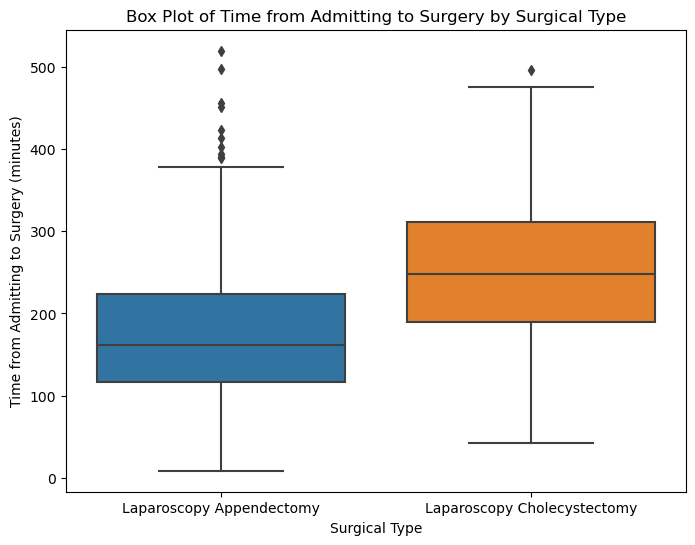

In [28]:
# Box plot of time from admitting to surgery by surgical type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x="Proc Descr Mod", y="Time from Admitting to Surgery", data=merged_df)
plt.xlabel("Surgical Type")
plt.ylabel("Time from Admitting to Surgery (minutes)")
plt.title("Box Plot of Time from Admitting to Surgery by Surgical Type")
plt.show()

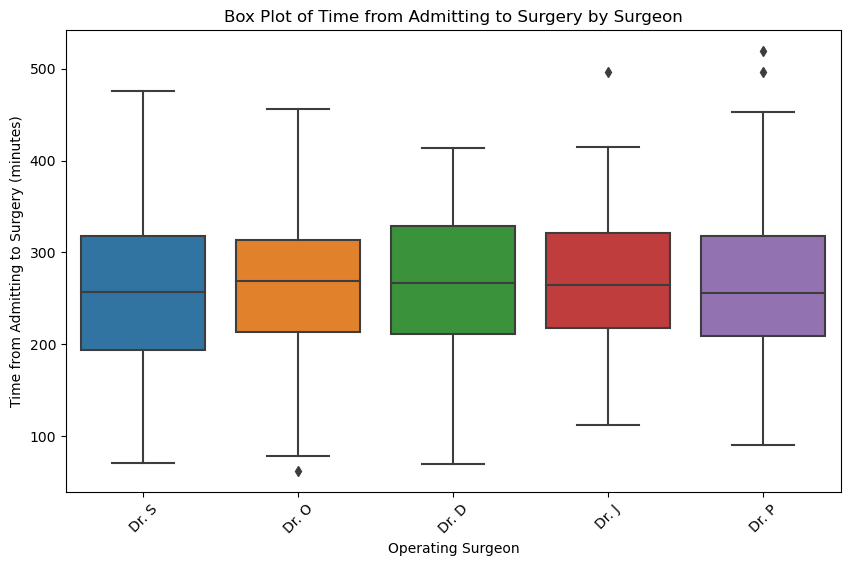

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Requesting Physician", y="Time from Admitting to Surgery", data=merged_df)
plt.xlabel("Operating Surgeon")
plt.ylabel("Time from Admitting to Surgery (minutes)")
plt.title("Box Plot of Time from Admitting to Surgery by Surgeon")
plt.xticks(rotation=45)
plt.show()

### In one paragraph, reflect on the how the process map exercise informed your work on these time series assignments. (1 Mark)  

Creating a process map gave me a clear picture of the steps in the ED process and how they relate to each other. This understanding helped me pinpoint where delays or waits might occur. By visualizing the relationships between discrete steps, it became easier to analyze the data for the time series assignments and select relevant variables. This guided a focused investigation into factors influencing process duration, contributing to more insightful analysis and interpret the results more effectively.